In [1]:
import sys
import os
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

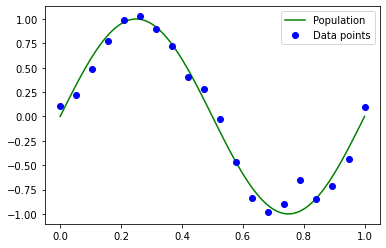

(20, 1)


In [2]:
X_pop= np.linspace(0,1,100,endpoint=True)
t_pop = (np.sin(2*X_pop*np.pi))
plt.plot(X_pop,t_pop,'-g', label='Population')


nt_points=20

X= np.linspace(0,1,nt_points,endpoint=True)

t= (np.sin(2*X*np.pi))

X= np.reshape(X,(-1,1))


c_noise=.15
noise= (c_noise*np.random.randn(len(X)))


t_noise=t+noise
plt.plot(X,t_noise,'ob', label='Data points')
plt.legend()

plt.show()

t_noise= np.reshape(t_noise,(-1,1))


print(np.shape(t_noise))

In [3]:
degree= 3

poly = PolynomialFeatures(degree,include_bias=True)

poly.fit(X)

X_feature_ext=poly.transform(X)

print(X_feature_ext, np.shape(X_feature_ext))





[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.26315789e-02 2.77008310e-03 1.45793847e-04]
 [1.00000000e+00 1.05263158e-01 1.10803324e-02 1.16635078e-03]
 [1.00000000e+00 1.57894737e-01 2.49307479e-02 3.93643388e-03]
 [1.00000000e+00 2.10526316e-01 4.43213296e-02 9.33080624e-03]
 [1.00000000e+00 2.63157895e-01 6.92520776e-02 1.82242309e-02]
 [1.00000000e+00 3.15789474e-01 9.97229917e-02 3.14914711e-02]
 [1.00000000e+00 3.68421053e-01 1.35734072e-01 5.00072897e-02]
 [1.00000000e+00 4.21052632e-01 1.77285319e-01 7.46464499e-02]
 [1.00000000e+00 4.73684211e-01 2.24376731e-01 1.06283715e-01]
 [1.00000000e+00 5.26315789e-01 2.77008310e-01 1.45793847e-01]
 [1.00000000e+00 5.78947368e-01 3.35180055e-01 1.94051611e-01]
 [1.00000000e+00 6.31578947e-01 3.98891967e-01 2.51931768e-01]
 [1.00000000e+00 6.84210526e-01 4.68144044e-01 3.20309083e-01]
 [1.00000000e+00 7.36842105e-01 5.42936288e-01 4.00058318e-01]
 [1.00000000e+00 7.89473684e-01 6.23268698e-01 4.920542

In [4]:
print('Input size/dim ', np.shape(X_feature_ext))
print('Input size/dim ', np.shape(t_noise))


inv_XTX= np.linalg.inv(X_feature_ext.T.dot(X_feature_ext))
print ( np.shape(inv_XTX))
print (inv_XTX)

upper = (X_feature_ext.T).dot(t_noise)


theta= inv_XTX.dot(upper)
#theta= inv_XTX.dot(upper)
print ( np.shape(theta), theta)




Input size/dim  (20, 4)
Input size/dim  (20, 1)
(4, 4)
[[   0.5622812    -4.08573311    7.94974591   -4.51844532]
 [  -4.08573311   44.42183681 -100.93725896   62.34273253]
 [   7.94974591 -100.93725896  247.29944863 -159.91752564]
 [  -4.51844532   62.34273253 -159.91752564  106.61168376]]
(4, 1) [[ -0.12336801]
 [ 10.88896887]
 [-31.73327638]
 [ 21.06189842]]


In [5]:
X_new= np.linspace(0,1,100,endpoint=True)

X_new = np.reshape(X_new,(-1,1))

print (np.shape(X_new))

X_new_feature_ext=poly.transform(X_new)


print (np.shape(X_new_feature_ext))



print (np.shape(theta), np.shape(X_new_feature_ext))


y_h= X_new_feature_ext.dot(theta)
                        

# y_h = np.reshape(y_h,(-1,1))

print (np.shape(y_h))


(100, 1)
(100, 4)
(4, 1) (100, 4)
(100, 1)


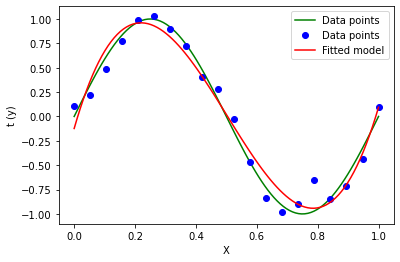

In [6]:
X_pop= np.linspace(0,1,100,endpoint=True)
t_pop = (np.sin(2*X_pop*np.pi))
plt.plot(X_pop,t_pop,'-g',label='Data points')


plt.plot(X,t_noise,'ob', label='Data points')

plt.plot(X_new,y_h,'-r', label= 'Fitted model')

plt.xlabel('X')
plt.ylabel('t (y)')


plt.legend()
plt.show()

In [7]:
theta

array([[ -0.12336801],
       [ 10.88896887],
       [-31.73327638],
       [ 21.06189842]])

In [8]:
np.sqrt(np.sum(theta**2))

39.61299354667432

# Regularization

In [9]:
dim_lamb=np.shape(X_feature_ext)[1]

lamb=0
L2=lamb *np.identity(dim_lamb)



In [10]:
#print(np.shape(X_feature_ext),np.shape(t_noise))

inv_XTX= np.linalg.inv(X_feature_ext.T.dot(X_feature_ext)+L2)


print ( np.shape(inv_XTX),np.shape(L2))

upper = (X_feature_ext.T).dot(t_noise)


theta= inv_XTX.dot(upper)



(4, 4) (4, 4)


In [11]:
X_new= np.linspace(0,1,100,endpoint=True)

X_new = np.reshape(X_new,(-1,1))

#print (np.shape(X_new))

X_new_feature_ext=poly.transform(X_new)


print (np.shape(X_new_feature_ext))





print (np.shape(theta), np.shape(X_new_feature_ext))


y_h= X_new_feature_ext.dot(theta)
                        

# y_h = np.reshape(y_h,(-1,1))

print (np.shape(y_h))

(100, 4)
(4, 1) (100, 4)
(100, 1)


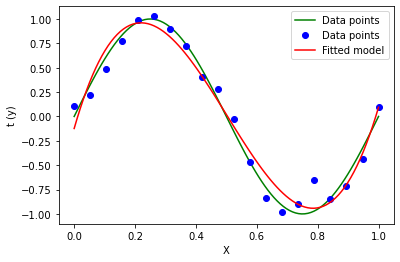

In [12]:
X_pop= np.linspace(0,1,100,endpoint=True)
t_pop = (np.sin(2*X_pop*np.pi))
plt.plot(X_pop,t_pop,'-g',label='Data points')


plt.plot(X,t_noise,'ob', label='Data points')

plt.plot(X_new,y_h,'-r', label= 'Fitted model')

plt.xlabel('X')
plt.ylabel('t (y)')


plt.legend()
plt.show()